In [1]:
import random
from statistics import mean
import matplotlib.pyplot as plt

In [2]:
table_structure = [
('Coins', 1, 'Las_Vegas'),
('Crab', 1, 'Las_Vegas'),
('Bonus, %', 1, 'Las_Vegas'),
('Jail', 0, ''),
('FS/FB', 1, 'Las_Vegas'),
('Coins', 1, 'Las_Vegas'),
('New_Token', 1, 'Las_Vegas'),
('Crab', 1, 'Las_Vegas'),
('Bonus, %', 1, 'Las_Vegas'),
('Real_Money', 1, 'Las_Vegas'),
('Mystery_Card', 0, ''),
('Jail', 0, ''),
('Coins', 1, 'Singapore'),
('Crab', 1, 'Singapore'),
('FS/FB', 1, 'Singapore'),
('Mystery_Card', 0, ''),
('Bonus, %', 1, 'Singapore'),
('FS/FB', 1, 'Singapore'),
('Real_Money', 1, 'Singapore'),
('Mystery_Card', 0, ''),
('Jail', 0, ''),
('Coins', 1, 'Macao'),
('Crab', 1, 'Macao'),
('Bonus, %', 1, 'Macao'),
('Jail', 0, ''),
('FS/FB', 1, 'Macao'),
('Crab', 1, 'Macao'),
('New_Token', 1, 'Macao'),
('Coins', 1, 'Macao'),
('Bonus, %', 1, 'Macao'),
('Real_Money', 1, 'Macao'),
('Mystery_Card', 0, ''),
('Jail', 0, ''),
('Coins', 1, 'Monaco'),
('Crab', 1, 'Monaco'),
('FS/FB', 1, 'Monaco'),
('Mystery_Card', 0, ''),
('Bonus, %', 1, 'Monaco'),
('FS/FB', 1, 'Monaco'),
('Real_Money', 1, 'Monaco'),
('Mystery_Card', 0, ''),
('Jail', 0, ''),
]

In [3]:
# Count the number of stars needed for each city
city_star_requirements = {}

for name, star, city in table_structure:
    if city:
        if city not in city_star_requirements:
            city_star_requirements[city] = 0
        city_star_requirements[city] += star
        
city_star_requirements

{'Las_Vegas': 9, 'Singapore': 6, 'Macao': 9, 'Monaco': 6}

In [4]:
def run_simulation():
    stars_collected = {city: 0 for city in city_star_requirements}
    collected_stars_table = [False] * len(table_structure)
    steps = 0
    steps_per_city = {city: 0 for city in city_star_requirements}
    stars_history = {city: [] for city in city_star_requirements}
    index = -1
    in_jail = False
    
    cards_selected_count = {i: 0 for i in range(len(table_structure))}
    
    while not all(stars_collected[city] >= city_star_requirements[city] for city in city_star_requirements):
        steps += 1
        dice1 = random.randint(1, 6)
        dice2 = random.randint(1, 6)
        dice_roll = dice1 + dice2

        if in_jail:
            if dice1 != dice2:
                in_jail = False
            continue

        index = (index + dice_roll) % len(table_structure)
        name, star, city = table_structure[index]
        
        cards_selected_count[index] += 1

        if name == 'Jail':
            in_jail = True
            continue

        if city and star and not collected_stars_table[index]:
            stars_collected[city] += 1
            collected_stars_table[index] = True

        # Update steps_per_city when all stars are collected for a city
        for city_name in steps_per_city:
            if steps_per_city[city_name] == 0 and stars_collected[city_name] == city_star_requirements[city_name]:
                steps_per_city[city_name] = steps

        # Record the number of stars collected for each city at this step
        for city_name in stars_history:
            stars_history[city_name].append(stars_collected[city_name])

    return steps, stars_history, steps_per_city, cards_selected_count

Coins: 22 times selected, share: 19.82%
Crab: 19 times selected, share: 17.12%
Bonus, %: 15 times selected, share: 13.51%
Jail: 15 times selected, share: 13.51%
FS/FB: 16 times selected, share: 14.41%
New_Token: 4 times selected, share: 3.60%
Real_Money: 6 times selected, share: 5.41%
Mystery_Card: 14 times selected, share: 12.61%
Las_Vegas: 130 steps
Singapore: 113 steps
Macao: 115 steps
Monaco: 97 steps


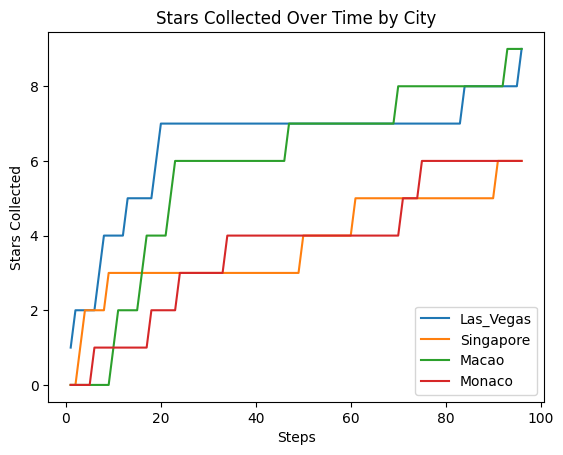

In [5]:
# Run a single simulation and get the stars_history and steps_per_city
steps_needed, stars_history, steps_per_city, cards_selected_count = run_simulation()

# Aggregate the counts based on the name
name_counts = {}
for index, count in cards_selected_count.items():
    name, _, _ = table_structure[index]
    if name in name_counts:
        name_counts[name] += count
    else:
        name_counts[name] = count

# Calculate the total count and the share of each name
total_count = sum(name_counts.values())
name_share = {name: count / total_count for name, count in name_counts.items()}

# Print the aggregated counts and share
for name, count in name_counts.items():
    share = name_share[name]
    print(f"{name}: {count} times selected, share: {share * 100:.2f}%")
# Print the count of steps needed to collect all stars for each city
for city, steps_count in steps_per_city.items():
    print(f"{city}: {steps_count} steps")
    
# Plot the stars collected over time for each city
for city in stars_history:
    x = range(1, len(stars_history[city]) + 1)
    plt.plot(x, stars_history[city], label=city)
plt.xlabel('Steps')
plt.ylabel('Stars Collected')
plt.title('Stars Collected Over Time by City')
plt.legend()
plt.show()

In [6]:
# Run the simulation n times and store the results
num_iterations = 10000
steps_per_city_results = []
name_counts_results = []

for _ in range(num_iterations):
    _, _, steps_per_city, cards_selected_count = run_simulation()
    steps_per_city_results.append(steps_per_city)
    name_counts_results.append(cards_selected_count)

# Calculate the mean number of steps for each city
mean_steps_per_city = {}
for city in city_star_requirements:
    mean_steps = mean([result[city] for result in steps_per_city_results])
    mean_steps_per_city[city] = mean_steps
    print(f"{city}: {mean_steps} mean of {num_iterations} steps")

# Aggregate the counts based on the name
total_name_counts = {}
for name_counts in name_counts_results:
    for index, count in name_counts.items():
        name, _, _ = table_structure[index]
        if name in total_name_counts:
            total_name_counts[name] += count
        else:
            total_name_counts[name] = count

print()

# Calculate the total count and the share of each name
total_count = sum(total_name_counts.values())
name_share = {name: count / total_count for name, count in total_name_counts.items()}

# Print the aggregated counts and share
for name, count in total_name_counts.items():
    share = name_share[name]
    print(f"{name}: {count} times selected, share: {share * 100:.2f}%")


Las_Vegas: 131.2197 mean of 10000 steps
Singapore: 113.8375 mean of 10000 steps
Macao: 132.8785 mean of 10000 steps
Monaco: 117.9004 mean of 10000 steps

Coins: 223893 times selected, share: 14.25%
Crab: 224774 times selected, share: 14.31%
Bonus, %: 223599 times selected, share: 14.23%
Jail: 223431 times selected, share: 14.22%
FS/FB: 224958 times selected, share: 14.32%
New_Token: 76017 times selected, share: 4.84%
Real_Money: 149861 times selected, share: 9.54%
Mystery_Card: 224588 times selected, share: 14.29%
